<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/6_mutual_information_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 1st June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/mutual-information
# Data Source: https://www.kaggle.com/datasets/toramky/automobile-dataset
#             Student alcohol consumption

# Introduction #

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

A great first step is to construct a ranking with a **feature utility metric**, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect *any* kind of relationship, while correlation only detects *linear* relationships.

Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is:
- easy to use and interpret,
- computationally efficient,
- theoretically well-founded,
- resistant to overfitting, and,
- able to detect any kind of relationship

# Mutual Information and What it Measures #

Mutual information describes relationships in terms of *uncertainty*. The **mutual information** (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

Here's an example from the *Ames Housing* data. The figure shows the relationship between the exterior quality of a house and the price it sold for. Each point represents a house.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Four categories of ExterQual: Fair, Typical, Good, Excellent. A scatter plot of SalePrice within each category.">
<figcaption style="textalign: center; font-style: italic"><center>Knowing the exterior quality of a house reduces uncertainty about its sale price.
</center></figcaption>
</figure>

From the figure, we can see that knowing the value of `ExterQual` should make you more certain about the corresponding `SalePrice` -- each category of `ExterQual` tends to concentrate `SalePrice` to within a certain range. The mutual information that `ExterQual` has with `SalePrice` is the average reduction of uncertainty in `SalePrice` taken over the four values of `ExterQual`. Since `Fair` occurs less often than `Typical`, for instance, `Fair` gets less weight in the MI score.

(Technical note: What we're calling uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.)

# Interpreting Mutual Information Scores #

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

The next figure will give you an idea of how MI values correspond to the kind and degree of association a feature has with the target.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Mutual information increases as the dependence between feature and target becomes tighter. <strong>Right:</strong> Mutual information can capture any kind of association (not just linear, like correlation.)
</center></figcaption>
</figure>
In the figure on the right there are four features. All four features are continuous and vary in a sinusoidal manner with respect to target. The feature that varies most, it has the least MI and the feature that varies linearly has the highest MI. In the left figure on the right, all target values, on an average, increase as feature values increases. But for some features (light brown), variations around mean is large and for some features (dark brown) variation around mean is small. Features with least variations have highest MI.   

Here are some things to remember when applying mutual information:
- MI can help you to understand the *relative potential* of a feature as a predictor of the target, considered by itself.
- It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI *can't detect interactions* between features. It is a **univariate** metric.
- The *actual* usefulness of a feature *depends on the model you use it with*. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.



# Example - Student Alcohol consumption

A dataset on social, gender and study data from secondary school students. Following was retrieved from [UCI machine learning repository](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption).

## About Data:

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content: Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)


In [1]:
# 1.0 Call libraries:

import numpy as np
import pandas as pd

# 1.0.1
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# 1.0.2
import seaborn as sns
from pathlib import Path

In [2]:
# 1.0.3 Matplotlib plotting style:

plt.style.use("seaborn-whitegrid")

<ipython-input-2-2adb1bd3be0d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
# 1.0.4 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# 1.1 Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 1.2 Where is data?

pathToFolder = "/gdrive/MyDrive/Colab_data_files/student_alcohol"


In [6]:
# 1.2.1 Full file path:

path = Path(pathToFolder) / "student-por.csv"

In [7]:
# 2.0 Read data

df = pd.read_csv(path)
df.shape
df.head()

(649, 33)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that *must* have a `float` dtype is *not* discrete. Categoricals (`object` or `categorial` dtype) can be treated as discrete by giving them a label encoding. (You can review label encodings in our [Categorical Variables](http://www.kaggle.com/alexisbcook/categorical-variables) lesson.)

## Handling missing values

In [8]:
# 2.1
df.isnull().sum().sum()

0

## Start analysis:

In [ ]:
# 2.2
X = df.copy()
y = X.pop("G1")

# 2.2.1 
# Avoid data leakage:

X.pop("G2")
X.pop("G3")

In [11]:
# 2.3 Label encoding for categoricals
# Refer: https://stackoverflow.com/a/39390208/3282777
#

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
# 2.4 All discrete features should now have integer
#     dtypes (double-check this before using MI!)

discrete_features = X.dtypes == int

# 2.4.1
discrete_features

school        True
sex           True
age           True
address       True
famsize       True
Pstatus       True
Medu          True
Fedu          True
Mjob          True
Fjob          True
reason        True
guardian      True
traveltime    True
studytime     True
failures      True
schoolsup     True
famsup        True
paid          True
activities    True
nursery       True
higher        True
internet      True
romantic      True
famrel        True
freetime      True
goout         True
Dalc          True
Walc          True
health        True
absences      True
dtype: bool

Scikit-learn has two mutual information metrics in its `feature_selection` module: one for real-valued targets (`mutual_info_regression`) and one for categorical targets (`mutual_info_classif`). Our target, `G1`, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [14]:
# 3.0
def make_mi_scores(X, y, discrete_features):
    # 6.0.1 Get sores
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    # 6.0.2 Transform mi_scores to a Series:
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    # 6.0.3 Sort Series in Descending order:
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



In [15]:
# 3.1 Execute the function now:

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

failures     0.101703
school       0.068513
Mjob         0.038567
schoolsup    0.030771
sex          0.021012
Pstatus      0.016150
goout        0.012286
Fjob         0.001370
nursery      0.000000
Walc         0.000000
Name: MI Scores, dtype: float64

And now a bar plot to make comparisions easier:

In [16]:
# 4.0 Plot function:

def plot_mi_scores(scores):
    # Scores sorted in ascending order:
    scores = scores.sort_values(ascending=True)
    # Map parameters:
    width = np.arange(len(scores))
    # Write ticks as per scores index:
    ticks = list(scores.index)
    # Plot width:
    plt.barh(width, scores)
    # Plot yticks
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


<Figure size 800x500 with 0 Axes>

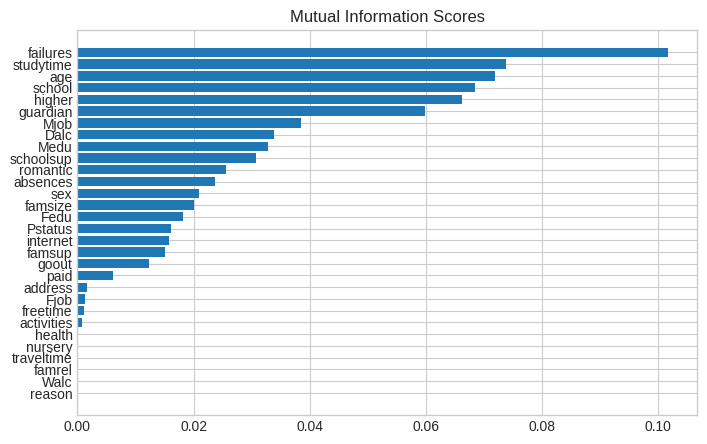

In [17]:
# 4.1
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
##------------ Done -------------------